<a href="https://colab.research.google.com/github/greymouse1/geospatialObjectDetection/blob/main/Ex2Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Copywrite 2024, Duality Robotics

# Detailed instructions for the Exercise 2 process can be found at:
# falcon.duality.ai/secure/documentation/ex2-colab-install
#
# Specific instructions for this step start at:
# falcon.duality.ai/secure/documentation/ex2-colab-setup

# In order for you to use this notebook, you first need to upload to Google
# Drive the output data generated by Falcon and the testing images.
#
# Note:  This process does need access to read/write files on your Google Drive.
# If you don't want Colab to have access to your Google Drive, you can
# upload to a Google account you set up just for experiments.


# 1

# This module provides a portable way of using operating system dependent
# functionality
import os, sys
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# 2

# We  need to make sure we are running a GPU enabled instance.  If this
# fails, go to the Edit menu, choose 'Notebook settings' and select a 'T4 GPU'
# under Hardware Accelerator.
# The GPU makes the training go MUCH faster, so it's worth setting up now.
!nvidia-smi

Tue Nov 25 20:17:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [11]:
#3

# Now we install Ultralytics, the specific python version, and
# CUDA. These are all files needed for training.

# Those using their local machine have to download and install these, plus a
# conda environment to contain this specific setup. By using Colab, you are
# avoiding this and all the issues that may arise during the process.

#!pip install ultralytics==8.2.103 -q
!pip install -U ultralytics

from IPython import display
display.clear_output

import ultralytics
ultralytics.checks()

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


In [3]:
#4

# Now we mount (connect) the folder on Drive containing the training data.
# You will have to grant Colab access to your drive where you stored Exercise2.
# After running the code below, the system will access for credentials - enter
# the ones for the particular Google account that controls the folder that
# contains the Falcon datasets.

# Note:  You may find that this does not work if the notebook and the Drive
# folder are owned by different Google accounts.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#5

# Now change directory to the folder containing your
# Output/(time_and_date_label_of_dataset). It might look like this:
#
# %cd /content/drive/MyDrive/ColabNotebooks/Exercise2/Output/2024-10-30-16-16-04

# MAKE SURE TO DELETE THE SPACE IN THE COLABNOTEBOOK FILE NAME
# If you don't, this cell might not connect
# correct is /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57

%cd /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57
!ls

/content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57
classes.txt		 predict.py  train.py	   yolo11n.pt	     yolov8s.pt
convert_preds_to_csv.py  runs	     val	   yolo_params.yaml
predictions		 train	     visualize.py  yolov8n.pt


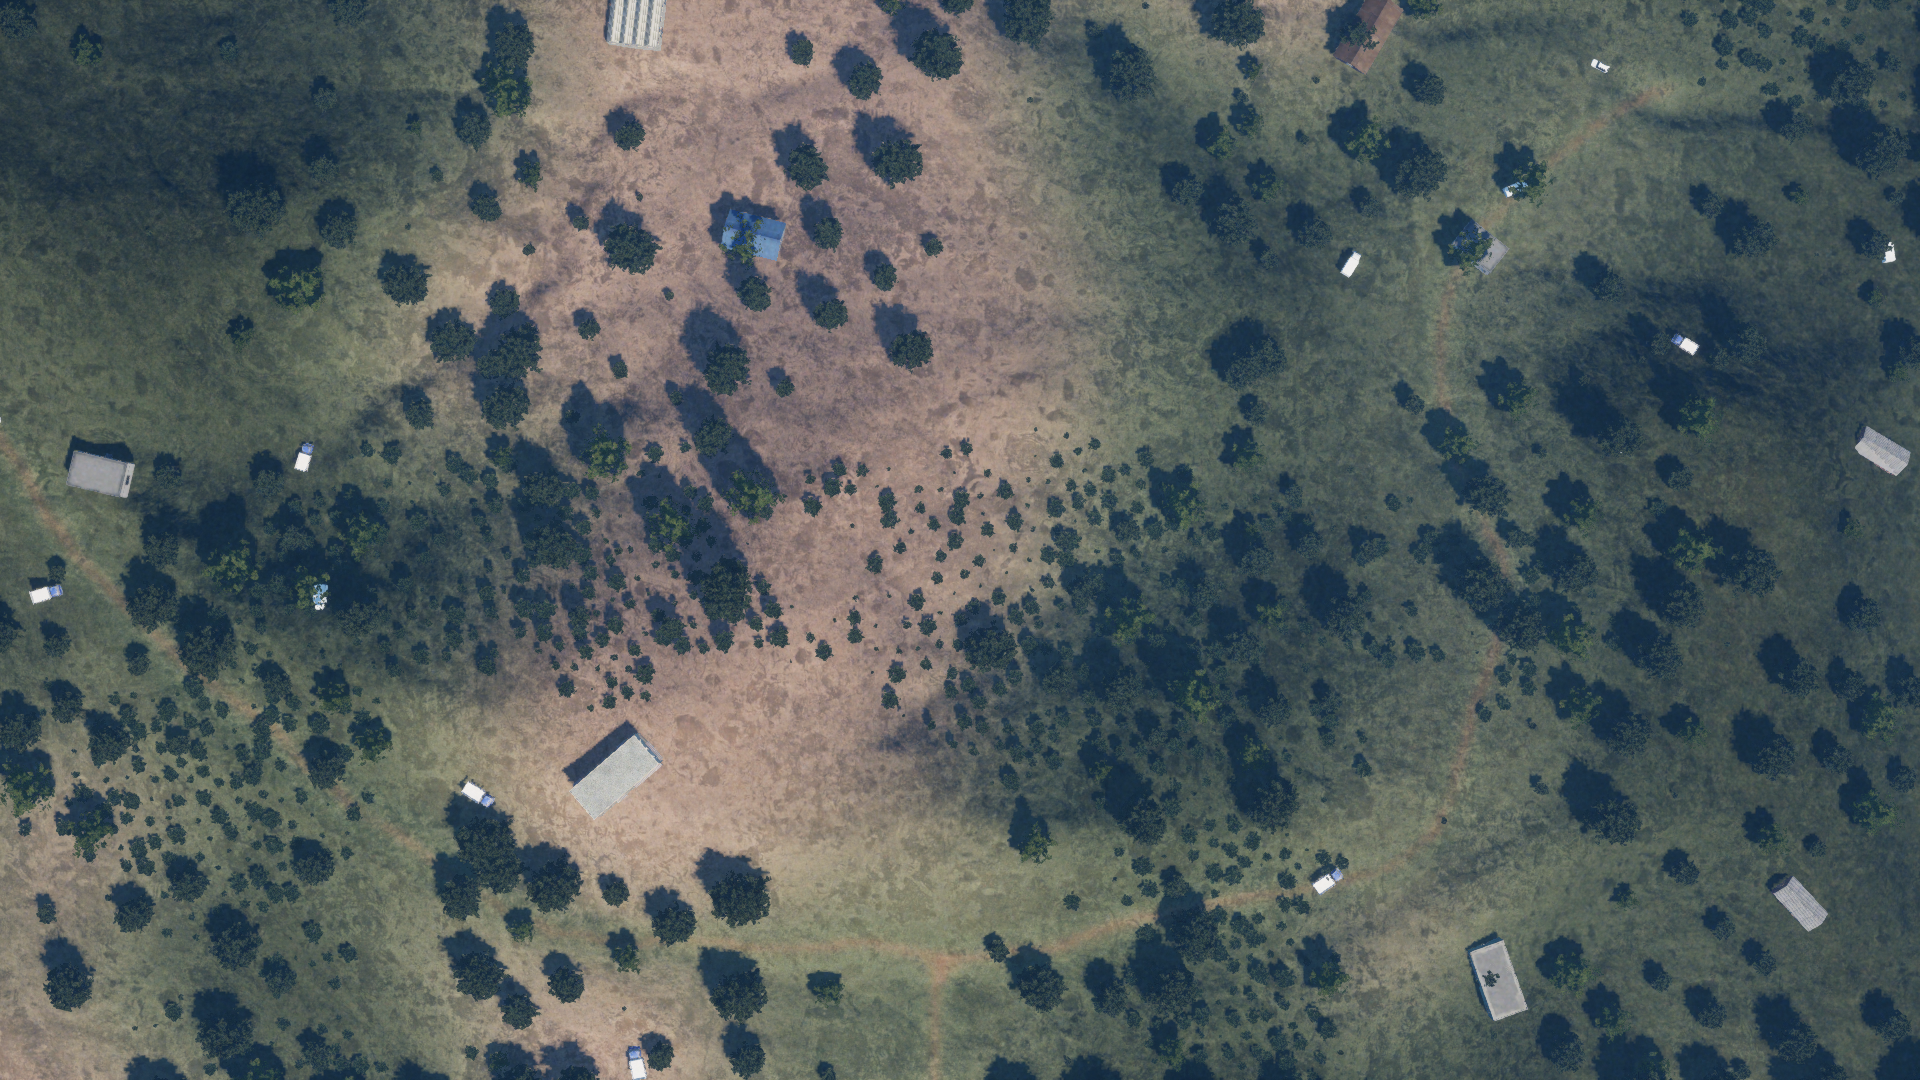

In [14]:
#6

# This is a quick test to confirm that you've moved to the right folder and
# that the notebook can access the images.  You can hide the output after the
# test.
from IPython.display import Image
Image('./train/images/000000001.png')

In [32]:
#7

# Now that we have access to the images, we can run the training script
# that Falcon created when it generated the data set.

# Please note that this will take a little while - 20-30 minutes.
# You may need to stay active on the page to avoid a timeout.
# You may notice that the output pauses at times, particuarly at the start.

# While this runs, open and read the Training Files and Best Practices page:
# falcon.duality.ai/secure/documentation/ex2-colab--training

# Also open and read the Understanding the Training Outputs page:
# falcon.duality.ai/secure/documentation/ex2-colab-training-output

# On these pages you'll learn about the training output metrics and files.

#!pip install -U ultralytics
%run train.py

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/yolo_params.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.0001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/runs/detect/train/weights/best.pt, momentum=0.9, mosaic=0.4, multi_scale=Fals

<Figure size 640x480 with 0 Axes>

In [33]:
#8

# The training process will output a mAP50 score, but this score doesn't necessarily
# indicate that the model will perform well when shown images from the physical
# world. A low mAP50 is a bad sign, but a high mAP50 is just a step in the right
# direction.

# In order to see how the model performs in the physical world, we must test it
# on images from the physcial world.

# At this point, make sure to read the "Understanding the Training Outputs" page
# if you haven't already:
# falcon.duality.ai/secure/documentation/ex2-colab-training-output
# This page will give you context for the process before you move on to testing.

# When you're ready, run the test script by pressing "play" on this cell.
# This script tells the YOLO model to look at the images in the testImages
# folder and make predictions.

# If this isn't the first time you're run this training,
# the system will prompt you to select which model you'd like to validate. Just
# choose the highest number to test the latest.

# While this is processing, read this page:
# falcon.duality.ai/secure/documentation/ex2-colab-testing-output

%run predict.py

Select the training folder:
0: train
1: train2
2: train3
3: train4
4: train5
5: train6
6: train7
7: train8
8: train9
9: train10
10: train11
10

image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/102.jpg: 640x544 249 buildings, 41 vehicles, 16.8ms
Speed: 2.9ms preprocess, 16.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/103.jpg: 640x576 6 buildings, 16 vehicles, 17.0ms
Speed: 3.1ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 576)

image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/107.jpg: 416x640 11 buildings, 6 vehicles, 13.8ms
Speed: 3.4ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/../testImages/images/11.jpg: 320x64

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:653: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:697: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:697: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultraly

                   all        844          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 1.7ms preprocess, 7.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/drive/MyDrive/ColabNotebooks/Exercise2/2025-11-22-21-48-57/runs/detect/val7


<Figure size 640x480 with 0 Axes>

In [35]:
# Convert labels to csv
%run convert_preds_to_csv.py

Found 844 test images

 Success! Submission saved to submission.csv
   Total predictions: 844
   Validation errors: 0
